In [4]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler

In [53]:
df=pd.read_csv("FuelConsumptionCo2.csv")

In [54]:
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


# CLUSTER:

In [14]:
X=df[["FUELCONSUMPTION_CITY","CO2EMISSIONS"]]

In [15]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)
X.shape

(1067, 2)

In [16]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

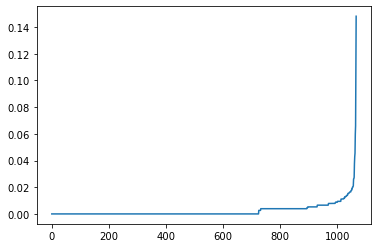

In [17]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [24]:
epsilon = 0.08
minimumSamples = 5
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels

array([0, 0, 0, ..., 0, 0, 0])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


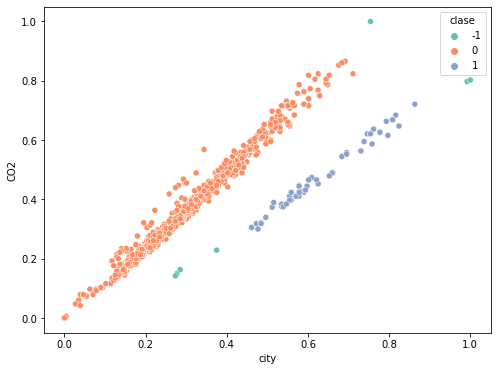

In [25]:
df = pd.DataFrame()
df["city"]= X[:,0]
df["CO2"] = X[:,1]
df["clase"]=labels
plt.figure(figsize=(8,6))
sns.scatterplot(df["city"],df["CO2"],hue = df["clase"], palette="Set2")
plt.show()

# REGRESIÓN LINEAL:

- CLUSTER 0:

In [32]:
df_clase0=df[df["clase"]==0]
df_clase0

,city,CO2,clase
0,0.207031,0.231579,0
1,0.257812,0.297368,0
2,0.054688,0.073684,0
3,0.316406,0.386842,0
4,0.292969,0.357895,0
...,...,...,...
1062,0.343750,0.428947,0
1063,0.335938,0.410526,0
1064,0.343750,0.428947,0
1065,0.324219,0.400000,0


In [35]:
X = df_clase0.city.values.reshape(974,1)
y = df_clase0.CO2.values
X.shape

(974, 1)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [38]:
from sklearn import linear_model
regresion_lineal = linear_model.LinearRegression()
regresion_lineal.fit(X_train, y_train)

# Encontramos los coeficientes de la recta  
print ('w_1: ', regresion_lineal.coef_)
print ('w_0: ',regresion_lineal.intercept_)

w_1:  [1.25737086]
w_0:  -0.011284395470625097


In [39]:
regresion_lineal.intercept_

-0.011284395470625097

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


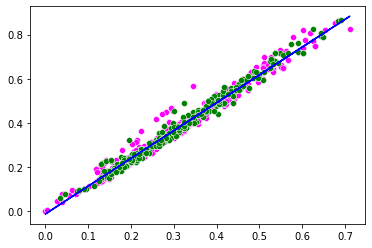

In [40]:
sns.scatterplot(X_train.flatten(),y_train.flatten(), color="magenta") 
#datos de prueba (green)
sns.scatterplot(X_test.flatten(),y_test.flatten(), color="green")  
#regresión
plt.plot(X_train, regresion_lineal.coef_[0]*X_train + regresion_lineal.intercept_, '-b')
plt.show()

In [41]:
yhat = regresion_lineal.predict(X_test)

for i,j in zip(yhat,y_test):
    print("Predicción: ",i, "Valor real: ",j)

Predicción:  0.48969930594753885 Valor real:  0.47894736842105257
Predicción:  0.18026819624808463 Valor real:  0.22631578947368425
Predicción:  0.41602523220957355 Valor real:  0.41315789473684206
Predicción:  0.5682849846013684 Valor real:  0.6
Predicción:  0.49952251577926754 Valor real:  0.5263157894736842
Predicción:  0.6026662190124189 Valor real:  0.6289473684210526
Predicción:  0.49952251577926754 Valor real:  0.4842105263157894
Predicción:  0.4209368371254379 Valor real:  0.4236842105263158
Predicción:  0.799130415646993 Valor real:  0.7921052631578946
Predicción:  0.38655560271438744 Valor real:  0.3868421052631579
Predicción:  0.48478770103167446 Valor real:  0.5210526315789473
Predicción:  0.31288152897642213 Valor real:  0.2973684210526316
Predicción:  0.2539422699860499 Valor real:  0.22368421052631582
Predicción:  0.34235115847160824 Valor real:  0.3263157894736842
Predicción:  0.533903750190318 Valor real:  0.5578947368421052
Predicción:  0.37182078796679435 Valor real:

In [42]:
regresion_lineal.score(X_test,y_test)

0.9827177687982668

In [43]:
from sklearn.metrics import  r2_score #r2_score 
r2_score(y_test,yhat)

0.9827177687982668

- CLUSTER 1:

In [33]:
df_clase1=df[df["clase"]==1]
df_clase1

,city,CO2,clase
145,0.539062,0.373684,1
147,0.578125,0.410526,1
180,0.730469,0.563158,1
182,0.824219,0.647368,1
206,0.554688,0.397368,1
...,...,...,...
725,0.460938,0.305263,1
763,0.515625,0.389474,1
915,0.621094,0.465789,1
918,0.578125,0.423684,1


In [45]:
X = df_clase1.city.values.reshape(83,1)
y = df_clase1.CO2.values
X.shape

(83, 1)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [47]:
regresion_lineal = linear_model.LinearRegression()
regresion_lineal.fit(X_train, y_train)

# Encontramos los coeficientes de la recta  
print ('w_1: ', regresion_lineal.coef_)
print ('w_0: ',regresion_lineal.intercept_)

w_1:  [1.03372014]
w_0:  -0.17383492223745556


In [48]:
regresion_lineal.intercept_

-0.17383492223745556

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


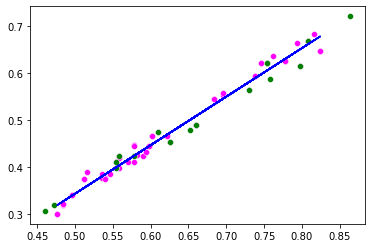

In [49]:
sns.scatterplot(X_train.flatten(),y_train.flatten(), color="magenta") 
#datos de prueba (green)
sns.scatterplot(X_test.flatten(),y_test.flatten(), color="green")  
#regresión
plt.plot(X_train, regresion_lineal.coef_[0]*X_train + regresion_lineal.intercept_, '-b')
plt.show()

In [50]:
yhat = regresion_lineal.predict(X_test)

for i,j in zip(yhat,y_test):
    print("Predicción: ",i, "Valor real: ",j)

Predicción:  0.45608828706264337 Valor real:  0.4736842105263158
Predicción:  0.5812653350645861 Valor real:  0.5631578947368421
Predicción:  0.6054931508068976 Valor real:  0.6210526315789473
Predicción:  0.47224016422418436 Valor real:  0.4526315789473684
Predicción:  0.3995567169972498 Valor real:  0.3973684210526316
Predicción:  0.5085818878376516 Valor real:  0.4894736842105263
Predicción:  0.662024720872291 Valor real:  0.6684210526315789
Predicción:  0.6499108130011353 Valor real:  0.6157894736842106
Predicción:  0.31475936189915965 Valor real:  0.31842105263157894
Predicción:  0.3995567169972498 Valor real:  0.41052631578947363
Predicción:  0.40359468628763506 Valor real:  0.4236842105263158
Predicción:  0.5005059492568811 Valor real:  0.47894736842105257
Predicción:  0.7185562909376846 Valor real:  0.7210526315789474
Predicción:  0.6095311200972828 Valor real:  0.5868421052631578
Predicción:  0.4237845327395614 Valor real:  0.4236842105263158
Predicción:  0.6054931508068976 Va

In [51]:
regresion_lineal.score(X_test,y_test)

0.9804399148324052

# CLUSTER:

In [55]:
Y=df[["FUELCONSUMPTION_HWY","CO2EMISSIONS"]]

In [56]:
Y = MinMaxScaler().fit_transform(Y)
Y.shape

(1067, 2)

In [57]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(Y)
distances, indices = nbrs.kneighbors(Y)

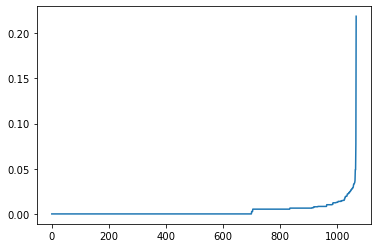

In [58]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [71]:
epsilon = 0.07
minimumSamples = 4
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(Y)
labels = db.labels_
labels

array([0, 0, 0, ..., 0, 0, 0])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


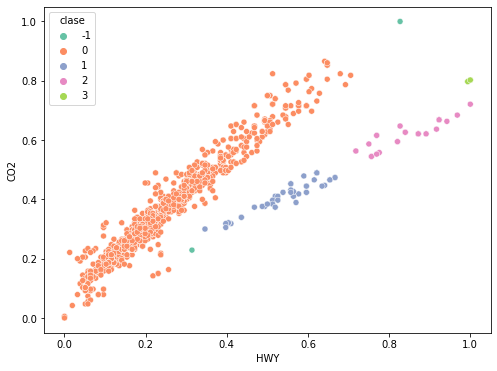

In [72]:
df = pd.DataFrame()
df["HWY"]= Y[:,0]
df["CO2"] = Y[:,1]
df["clase"]=labels
plt.figure(figsize=(8,6))
sns.scatterplot(df["HWY"],df["CO2"],hue = df["clase"], palette="Set2")
plt.show()